In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

# 3. 2D Fourier Transform

## 3.1 Fourier Transform

Text(0.5, 1.0, 'cornee.png')

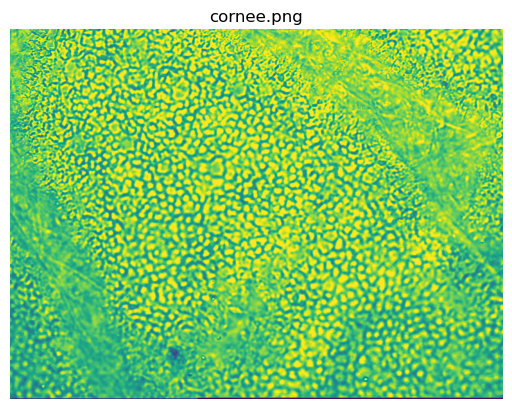

In [2]:
cornee = iio.imread('images/cornee.png')

plt.imshow(cornee)
plt.axis('off')
plt.title('cornee.png')

Text(0.5, 1.0, 'phase')

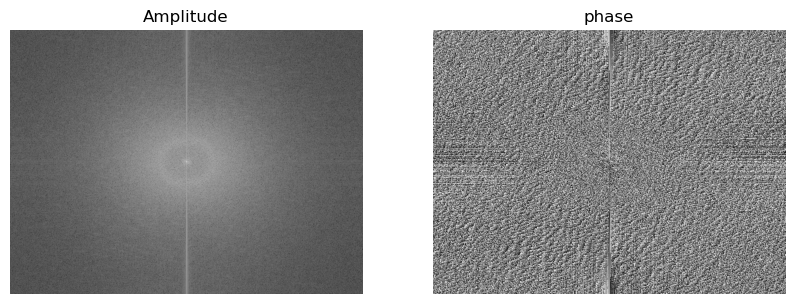

In [5]:
spectre = np.fft.fftshift(np.fft.fft2(cornee))
amplitude = abs(spectre)
phase = np.angle(spectre)

_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(np.log(1+amplitude), 'gray')
ax[0].axis('off')
ax[0].set_title('Amplitude')

mmax, mmin = np.max(phase), np.min(phase)
if (mmax == mmin):
    B = 0
else :
    B = 255*(phase-mmin)/(mmax-mmin);

ax[1].imshow(B, 'gray')
ax[1].axis('off')
ax[1].set_title('phase')

## 3.2 Inverse Fourier Transform

Text(0.5, 1.0, 'Inverse FT on phase')

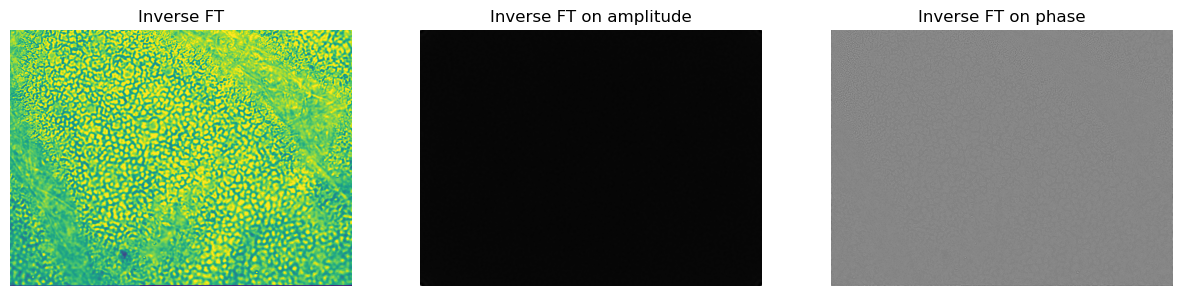

In [ ]:
spectre_inv = np.fft.ifft2(np.fft.fftshift(spectre))
amplitude_inv = np.real(np.fft.ifft2(np.fft.fftshift(amplitude)))
phase_inv = np.real(np.fft.ifft2(np.fft.fftshift(np.exp(1j*phase))))

_, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].imshow(np.real(spectre_inv))
ax[0].axis('off')
ax[0].set_title('Inverse FT')

ax[1].imshow(amplitude_inv, 'gray')
ax[1].axis('off')
ax[1].set_title('Inverse FT on amplitude')

ax[2].imshow(phase_inv, 'gray')
ax[2].axis('off')
ax[2].set_title('Inverse FT on phase')

# 3.3 Low-pass and high-pass filtering

In [34]:
def LowPassFilter (spectrum, cut : int) :
    """ Low pass filter of the FFT (spectrum)
    The shape of this filter is a square . fftshift has been applied so that
    frequency 0 lays at center of spectrum image
    @param spectrum: FFT2 transform
    @param cut : cut value of filter (no physical unit , only number of pixels )
    """
    X,Y = spectrum.shape
    mask = np.zeros ((X,Y) , "int" )
    mx = X//2
    my = Y//2
    mask[mx-cut:mx+cut, my-cut:my+cut] = 1
    f = spectrum*mask
    plt.figure()
    plt.imshow(abs(f) )
    plt.title('Low pass filter ')
    return f

In [44]:
def HighPassFilter (spectrum, cut : int) :
    """ High pass filter of the FFT (spectrum)
    The shape of this filter is a square . fftshift has been applied so that
    4 frequency 0 lays at center of spectrum image
    @param spectrum: FFT2 transform
    6 @param cut : cut value of filter (no physical unit , only number of pixels )
    """
    X,Y = spectrum.shape;
    mask = np.ones((X,Y) , "int" ) ;
    mx = X//2; my = Y//2;
    mask[mx-cut:mx+cut, my-cut:my+cut] = 0;
    f = spectrum * mask;
    plt.figure()
    plt.imshow(np.log(1+abs(f ) ) ) ;
    plt.title( 'High pass filter')
    return f ;

In [45]:
# Displays spectrum and phase in an image ( grayscale )
def viewSpectrumPhase(amplitude, phase):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(np.log(1+amplitude), 'gray') ;
    mmax = np.max(phase);
    mmin = np.min(phase);
    if (mmax == mmin):
        B=0;
    else :
        B = 255*(phase-mmin)/(mmax-mmin);
    plt.subplot(1,2,2)
    plt.imshow(B, cmap=plt.cm.gray);

Text(0.5, 1.0, 'reconstruction after HP filtering')

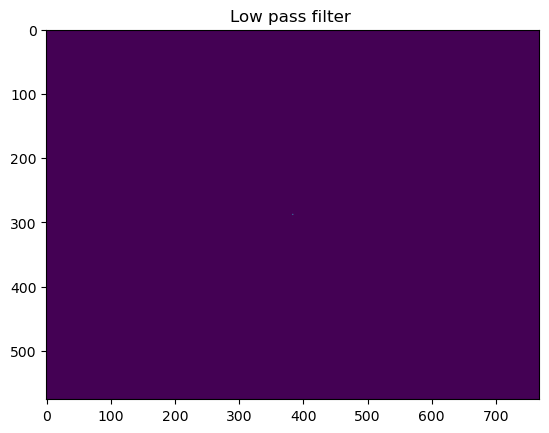

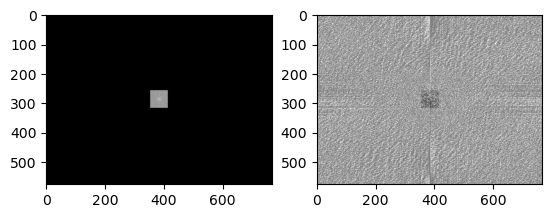

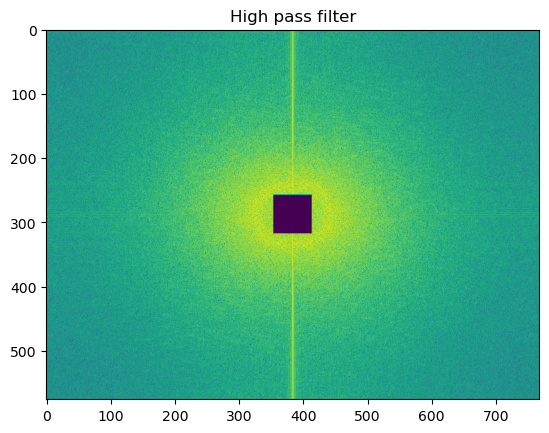

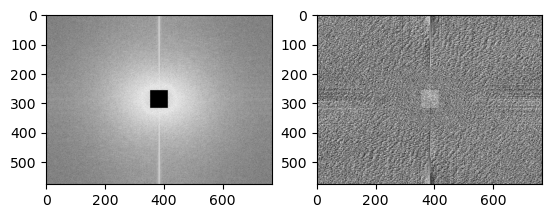

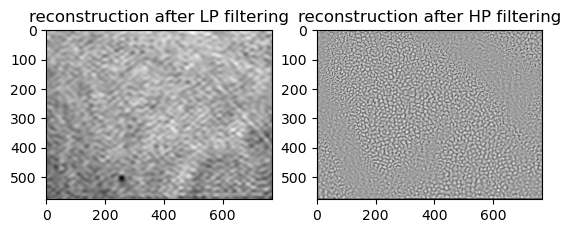

In [46]:
# FT of original image
cornea = iio.imread('images/cornee.png')
spectre = np.fft.fftshift(np.fft.fft2(cornea))

# low pass filter
L = LowPassFilter(spectre, 30)
viewSpectrumPhase(abs(L), np.angle(L))
corneaLP = np.real(np.fft.ifft2(np.fft.fftshift(L)))

# high pass filter
H = HighPassFilter(spectre, 30)
viewSpectrumPhase(abs(H), np.angle(H))
corneaHP = np.real(np.fft.ifft2(np.fft.fftshift(H)))

# display results and filters
plt.figure()
plt.subplot(1,2,1)
plt.imshow(corneaLP, plt.cm.gray)
plt.title('reconstruction after LP filtering')
plt.subplot (1,2,2)
plt.imshow(corneaHP, plt.cm.gray)
plt.title('reconstruction after HP filtering')
